In [1]:
import inspect
import librosa
print(inspect.getfile(librosa)) # random 모듈의 위치

C:\Users\choic\anaconda3\envs\book\lib\site-packages\librosa\__init__.py


In [2]:
import librosa
from matplotlib import pyplot as plt
import sounddevice as sd

In [3]:
example_file_path = librosa.ex('trumpet')
print(f'예제 파일은 다음 위치에 있습니다.\n파일 경로: {example_file_path}')

예제 파일은 다음 위치에 있습니다.
파일 경로: C:\Users\choic\AppData\Local\librosa\librosa\Cache\sorohanro_-_solo-trumpet-06.ogg


In [4]:
y, sr = librosa.load(example_file_path)
# y는 소리의 Amplitude 벡터, sr은 Sampling Rate를 의미

In [5]:
sd.play(y)

### [벡터 값 20개 출력]

In [6]:
print(f' {y}\nsampling_rate : {sr}')

 [-1.4068224e-03 -4.4607223e-04 -4.1098078e-04 ...  7.9623060e-06
 -3.0417003e-05  1.2765067e-05]
sampling_rate : 22050


### [벡터 길이 출력]

In [7]:
print(f'y는 {len(y)} 길이의 벡터')

y는 117601 길이의 벡터


### [벡터 값 20개 출력]

In [8]:
print(f'y의 앞 20개 값은?\n{y[:20]}')

y의 앞 20개 값은?
[-1.4068224e-03 -4.4607223e-04 -4.1098078e-04  9.9920901e-05
  4.3150427e-05 -1.7485349e-04 -3.6783377e-04  1.4553138e-04
  5.0557830e-04  1.4929948e-03  1.8555219e-03  9.2913158e-04
 -4.0743878e-04 -2.0390339e-03 -1.2686776e-03 -5.3472776e-04
  8.9941407e-04  9.7593543e-04  1.0019976e-03 -1.2960718e-03]


y의 길이를 sampling rate로 나누면 y가 몇 초 데이터인지 알 수 있다.

### [0.1초까지 시각화]

In [9]:
print(f'y는 {len(y) / sr} 초의 신호 벡터!')

y는 5.333378684807256 초의 신호 벡터!


### [예시 데이터 시각화]

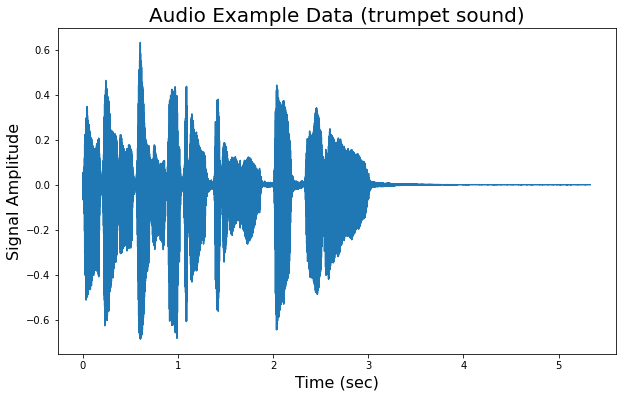

In [11]:
# y 벡터의 각 값에 해당하는 초 값이 들어있는 리스트 만들기
x = [i / sr for i in range(len(y))]

plt.figure(figsize=(10, 6))
plt.plot(x, y)
# 시간과 신호 진포 값을 시각화
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

### [1초까지 시각화]

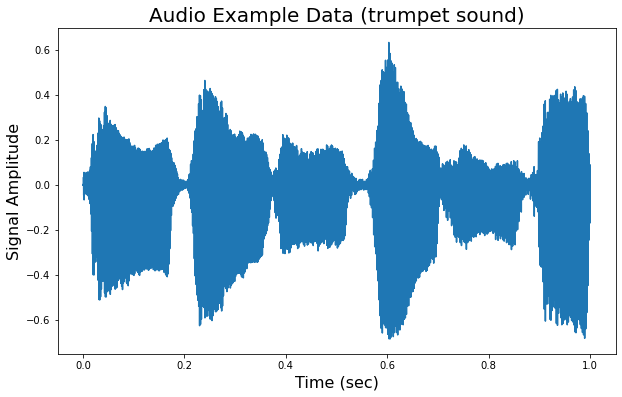

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x[:sr], y[:sr])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

### [0.1초까지 시각화]

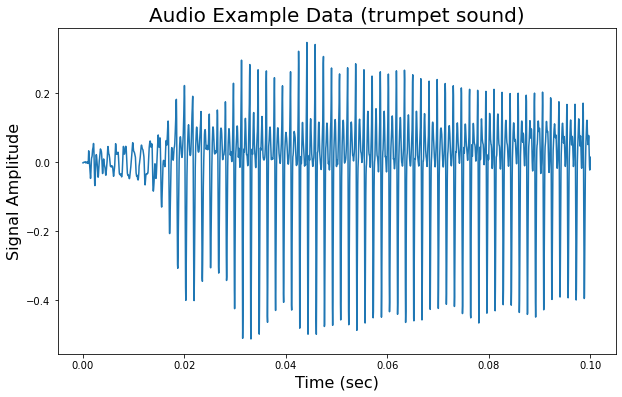

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x[:sr//10], y[:sr//10])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

### [0.01초까지 시각화]

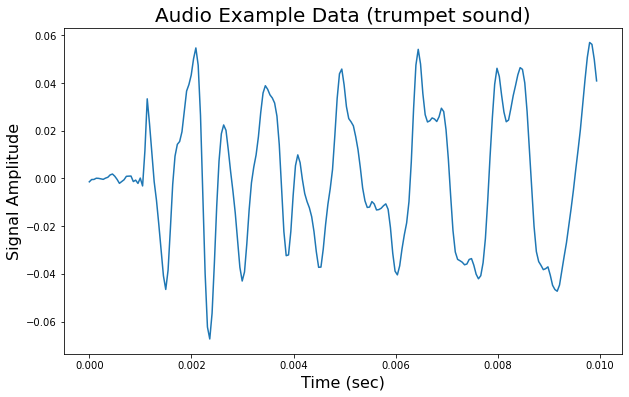

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x[:sr//100], y[:sr//100])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

## 비명 데이터 & 비 비명 데이터 수집 방식
- Youtube
    + Screaming이 포함된 검색어 키워드 중심으로 크롤링 및 음성 파일로 변환
    + 비명 소리만 있는 것이 아닌 다양한 소리도 섞여 있으므로 같이 사용
- 구글 검색
    + '효과음'키워드 중심으로 검색해 다양한 블로그와 카페에서 무료로 제공된 게이터 수집
    + 비명과 헷갈릴 수 있는 소방차 사이렌, 환호 소리, 트림 소리등 추가 수집
- 직접 녹음
    + 조용한 공간에서 직접 녹음하여 수집

*데이터 레이블링 - Audacity 프로그램 사용*

## 데이터 불러오기

### [Library Import]

In [15]:
import pandas as pd
import librosa
import numpy as np

### [파일 경로 설정]

In [16]:
example_audio_path = './example/꿩+klankbeeld.wav'
example_label_path = './example/꿩+klankbeeld.txt'

### [소리 데이터 로드]

In [17]:
example_audio, example_sr = librosa.load(example_audio_path)
print(
    f'audio 벡터 길이 : {len(example_audio)}\
    \naudio 파일 길이 : {len(example_audio) / sr} 초'
)

audio 벡터 길이 : 85604    
audio 파일 길이 : 3.882267573696145 초


### [레이블 데이터 로드]

In [18]:
example_label = pd.read_csv(
    example_label_path, sep = '\t', names=['start(s)', 'end(s)', 'label']
)
print(
    f'label :\
    \n{example_label}'
)

label :    
   start(s)    end(s)  label
0   0.00000  1.191226      0
1   1.33714  3.210092      0


## Frame Processing & 짝 맞추기

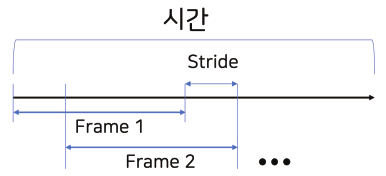

데이터를 동일한 구간, 즉 Frame으로 쪼갬

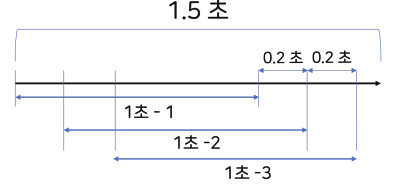

1초를 Frame으로, o.2초씩 Stride

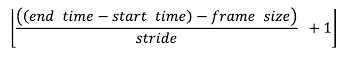

위의 식으로 몇개의 Frame이 나오는지 알 수 있음

### [Frame Size & Stride 선언 및 1초 미만 레이블 제거]

In [19]:
frame_size = 1
stride = 0.2

idx = example_label['end(s)'] - example_label['start(s)'] >= frame_size
example_label = example_label[idx]
# Frame Size(1초) 이상 레이블 구간만 선택한 다는 의미

### [레이블별 Frame 개수 & 총 Frame 개수 출력]

In [20]:
each_n_frames = (
    np.floor(
        (
            (
                (
                    example_label['end(s)'] - example_label['start(s)']
                ) - frame_size
            ) / stride
        ) + 1
    )
).astype(int).values

total_n_frames = sum(each_n_frames)

print(f'각각의 구간마다 프레임 개수 : {each_n_frames}')
print(f'총 구간의 프레임 개수 : {total_n_frames}')

각각의 구간마다 프레임 개수 : [1 5]
총 구간의 프레임 개수 : 6


### [Frame 벡터 & Target 벡터를 담을 빈 벡터 생성]

In [21]:
frame_vectors = np.zeros((int(total_n_frames), frame_size * sr))
target_vectors = np.zeros((int(total_n_frames), 1))
print(
    f'frame_vectors의 shape : {frame_vectors.shape}\
    \ntarget_vectors의 shape : {target_vectors.shape}'
)
for i in range(len(frame_vectors)):
    print(f'{i}-th frame vector[:5] : {frame_vectors[i][:5]}')

frame_vectors의 shape : (6, 22050)    
target_vectors의 shape : (6, 1)
0-th frame vector[:5] : [0. 0. 0. 0. 0.]
1-th frame vector[:5] : [0. 0. 0. 0. 0.]
2-th frame vector[:5] : [0. 0. 0. 0. 0.]
3-th frame vector[:5] : [0. 0. 0. 0. 0.]
4-th frame vector[:5] : [0. 0. 0. 0. 0.]
5-th frame vector[:5] : [0. 0. 0. 0. 0.]


In [22]:
current_idx = 0

for i, (start, end, y) in example_label.iterrows():
    for j in range(each_n_frames[i]):
        start_idx = int((start + j * stride) * example_sr)
        end_idx = start_idx + frame_size * example_sr
        frame_vectors[current_idx] = example_audio[start_idx:end_idx]
        target_vectors[current_idx] = y
        current_idx += 1
print(
    f'frame_vectors의 shape : {frame_vectors.shape}\
    \ntarget_vectors의 shape : {target_vectors.shape}'
)
for i in range(len(frame_vectors)):
    print(f'{i}-th frame vector[:5] : {frame_vectors[i][:5]}')
print(f'target_vectors : {target_vectors}')

frame_vectors의 shape : (6, 22050)    
target_vectors의 shape : (6, 1)
0-th frame vector[:5] : [-0.00265772  0.00103548  0.00018767 -0.00690498 -0.00465354]
1-th frame vector[:5] : [0.00462255 0.00474213 0.00503599 0.00415416 0.00215303]
2-th frame vector[:5] : [0.01052688 0.01409292 0.0158177  0.01223616 0.00895123]
3-th frame vector[:5] : [-0.00730914 -0.01086354 -0.0084091  -0.01000284 -0.01859629]
4-th frame vector[:5] : [0.05644109 0.06171763 0.05151632 0.03100646 0.016623  ]
5-th frame vector[:5] : [-0.001992   -0.00298869  0.00015296  0.00136695 -0.00181217]
target_vectors : [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## Feature Extraction

In [23]:
y = frame_vectors[1]

### [새 울음 소리 재생]

In [24]:
sd.play(y)

### [예시 데이터 벡터 살펴보기]

In [25]:
print(
    f'벡터의 shape : {y.shape}\
    \n벡터의 대략적인 모습은... :\n {y}'
)

벡터의 shape : (22050,)    
벡터의 대략적인 모습은... :
 [ 0.00462255  0.00474213  0.00503599 ... -0.00755864 -0.00101585
  0.00437011]


### [새 울음 소리 1초 데이터 시각화]

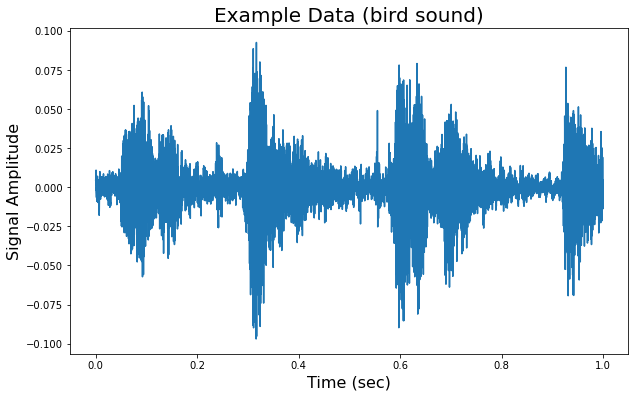

In [26]:
x = [t / sr for t in range(len(y))]

plt.figure(figsize = (10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

### [Mel Spectrogram 추출 및 시각화]

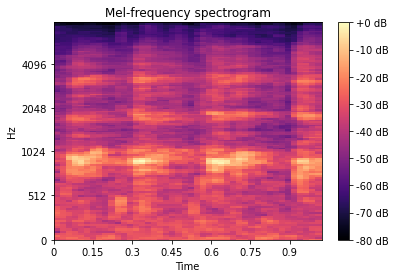

In [27]:
from librosa.display import specshow
# y는 소리의 Amplitude 벡터, sr은 Sampling Rate를 의미
S = librosa.feature.melspectrogram(y=y, sr=sr)
fig, ax = plt.subplots()
# 파워 단위에서 데시벨 단위로 변환
S_dB = librosa.power_to_db(S, ref=np.max)
img = specshow(
    S_dB, x_axis='time', y_axis='mel',
    sr = sr, fmax=8000, ax = ax
)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

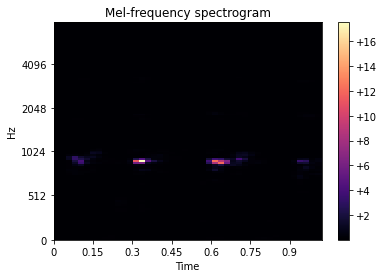

In [28]:
fig, ax = plt.subplots()
img = specshow(
    S, x_axis='time', y_axis='mel',
    sr=example_sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format='%+2.0f')
ax.set(title='Mel-frequency spectrogram')
plt.show()

### [데이터 차원 변화 출력]

In [29]:
print(
    f'1초 신호 데이터는 다음과 같이 변합니다.\
    \nBefore shape (signal) : {y.shape}\
    \nAfter shape (Mel Spectrogram) : {S_dB.shape}'
)

1초 신호 데이터는 다음과 같이 변합니다.    
Before shape (signal) : (22050,)    
After shape (Mel Spectrogram) : (128, 44)


## 레이블 데이터 정리

### [Library Import]

In [30]:
from os import listdir
from os.path import join, splitext
import pandas as pd

### [레이블 파일 출력]

In [32]:
label_path = './data/labels/'
label_files = [
    f for f in listdir(label_path)
    if splitext(join(label_path, f))[-1] == '.txt'
]

In [33]:
print(
    f'label file 목록 예시 : {label_files[:4]}'
)

label file 목록 예시 : ['-42p_iyrthm.txt', '-flgshtdxq8.txt', '-l-vzbuvlgc.txt', '-xnhugesias.txt']


### [레이블 정보 모음 파일 생성]

In [36]:
list_file_fn = 'file_list.xlsx'  # (1)
file_n = 0
with pd.ExcelWriter(list_file_fn) as writer:  # (2)
    audio_names = []  # (3)
    for i, file_name in enumerate(label_files):
        if file_name[:-3] + 'wav' in listdir('./data/raw_data/'):
            temp = pd.read_csv(label_path + file_name, sep='\t', header=None)
            temp.columns = ['start(s)', 'end(s)', 'label']
            temp.to_excel(writer, index=False, sheet_name=str(file_n))  # (4)
            file_n += 1
            audio_names.append(file_name[:-3] + 'wav')  # (5)
        if i == len(label_files) - 1:  # (6)
            pd.DataFrame(
                audio_names, columns=['audio_name']
            ).to_excel(writer, sheet_name='list')

---발표 범위---

In [38]:
import time
import math

import numpy as np
import pandas as pd
from tqdm import tqdm
import librosa
from torch.utils.data import Dataset, DataLoader

In [39]:
def load_label_data(file_path, i, frame_size):
    audio_label = pd.read_excel(file_path, sheet_name=str(i))  # (1)
    audio_label['label'] = audio_label['label'].apply(
        lambda x: int(str(x)[0])
    )
 
    audio_label = np.array(audio_label)  # (2)
    audio_label = audio_label[
        (audio_label[:, 1] - audio_label[:, 0] > frame_size)
    ]  # (3)
    return audio_label
 
def load_sound_data(file_path, sampling_rate):
    audio, sr = librosa.load(file_path, sr=sampling_rate)  # (4)
    return audio, sr

In [40]:
def process_frame(audio, sr, label, frame_size=1, stride=0.2):
    n = np.sum(
        np.floor(
            (
                (label[:, 1] - label[:, 0]) - frame_size
            ) / stride + frame_size
        )
    )  # (1)
 
    frame_vector = np.zeros((int(n), frame_size * sr))  # (2)
    target_vector = np.zeros((int(n), 1))  # (3)
 
    i = 0
 
    for temp_label in label:  # (4)
        start = temp_label[0]  # (5)
        end = temp_label[1]  # (6)
        y = temp_label[2]  # (7)
 
        eter = int(
            np.floor((((end - start) - frame_size) / stride) + 1)
        )  # (8)
 
        for j in range(eter):  # (9)
            start_idx = int((start + j * stride) * sr)
            end_idx = start_idx + frame_size * sr
            frame_vector[i] = audio[start_idx:end_idx]  # (10)
            target_vector[i] = y  # (11)
            i += 1
    return frame_vector, target_vector

In [41]:
def extract_mel_feature(frame_vector, sr, n_mels, st=512):
    mel_feature = librosa.feature.melspectrogram(
        y=frame_vector, sr=sr, n_mels=n_mels, hop_length=st
    )  # (1)
    mel_feature = librosa.core.power_to_db(
        mel_feature, ref=np.max
    )  # (2)
    return mel_feature

In [42]:
def extract_mel_power_feature(frame_vector, sr, n_mels, st=512):
    mel_feature = librosa.feature.melspectrogram(
        y=frame_vector, sr=sr, n_mels=n_mels, hop_length=st
    )  # (1)
    return mel_feature

In [43]:
sr = 22050
frame_size = 1
stride = 0.2
n_mels = 64
n_feature = 34
short_time = 512
 
file_list = pd.read_excel('./file_list.xlsx', sheet_name='list')  # (1)
 
frame_vectors = []
label_vectors = []
idx_count = []
 
for file_i, file_name in enumerate(file_list['audio_name']):  # (2)
    if file_i % 10 == 0:
        print(f'{file_i}-th 파일을 처리하고 있습니다.')
 
    label_data_temp = load_label_data(
        './file_list.xlsx', file_i, frame_size
    )  # (3)
 
    if len(label_data_temp) == 0:  # (4)
        idx_count.append(0)
        continue
 
    audio_path = './data/raw_data/' + file_name
    audio_data_temp, _ = load_sound_data(audio_path, sr)  # (5)
 
    frame_vector, label_vector = process_frame(
        audio=audio_data_temp, sr=sr, label=label_data_temp,
        frame_size=frame_size, stride=stride
    )  # (6)
    frame_vectors.append(frame_vector)
    label_vectors.append(label_vector)
    
    idx_count.append(frame_vector.shape[0])
    
frame_vectors = np.concatenate(frame_vectors)  # (7)
label_vectors = np.concatenate(label_vectors)

0-th 파일을 처리하고 있습니다.
10-th 파일을 처리하고 있습니다.
20-th 파일을 처리하고 있습니다.
30-th 파일을 처리하고 있습니다.
40-th 파일을 처리하고 있습니다.
50-th 파일을 처리하고 있습니다.
60-th 파일을 처리하고 있습니다.
70-th 파일을 처리하고 있습니다.
80-th 파일을 처리하고 있습니다.
90-th 파일을 처리하고 있습니다.
100-th 파일을 처리하고 있습니다.
110-th 파일을 처리하고 있습니다.
120-th 파일을 처리하고 있습니다.
130-th 파일을 처리하고 있습니다.
140-th 파일을 처리하고 있습니다.
150-th 파일을 처리하고 있습니다.
160-th 파일을 처리하고 있습니다.
170-th 파일을 처리하고 있습니다.
180-th 파일을 처리하고 있습니다.
190-th 파일을 처리하고 있습니다.
200-th 파일을 처리하고 있습니다.
210-th 파일을 처리하고 있습니다.
220-th 파일을 처리하고 있습니다.
230-th 파일을 처리하고 있습니다.
240-th 파일을 처리하고 있습니다.
250-th 파일을 처리하고 있습니다.


In [44]:
print(
    f'label vectors 의 shape: {label_vectors.shape}\
    \n비명 갯수 : {int(sum(label_vectors == 1))}\
    \n비명 아닌 갯수 : {int(sum(label_vectors == 0))}'
)

label vectors 의 shape: (6090, 1)    
비명 갯수 : 2237    
비명 아닌 갯수 : 3853


In [45]:
mel_features = []
for frame_vector in frame_vectors:
    mel_feature = extract_mel_feature(
        frame_vector=frame_vector, sr=sr, n_mels=n_mels
    )
    mel_features.append(mel_feature)
mel_features = np.stack(mel_features)
print(f'mel spectrogram shape: {mel_features.shape}')

mel spectrogram shape: (6090, 64, 44)


In [46]:
train_ratio = 0.7  # (1)

total_n = frame_vectors.shape[0]  # (2)
train_n = int(total_n * train_ratio)  # (3)

train_idxes = np.random.choice(total_n, train_n, replace=False)  # (4)

train_mask = np.zeros(shape=total_n, dtype=bool)  # (5)
train_mask[train_idxes] = True  # (6)

In [47]:
print(train_mask[:10])

[False  True  True False  True  True  True  True False  True]


In [48]:
train_idxes[:10]

array([1282, 1980,  309, 3466, 4624, 5537,  269, 1823, 5206, 5868])

In [49]:
train_mel_features = mel_features[train_mask]
valid_mel_features = mel_features[~train_mask]

train_label_vectors = label_vectors[train_mask]
valid_label_vectors = label_vectors[~train_mask]

In [50]:
print(sum(train_label_vectors==0))
print(sum(train_label_vectors==1))

[2710]
[1553]


In [51]:
print(sum(valid_label_vectors==0))
print(sum(valid_label_vectors==1))

[1143]
[684]


## Pytorch 데이터셋 & 로더 구현

In [52]:
class ScreamDataset(Dataset):
    def __init__(self, x, y):
        self.audio_features = x
        self.labels = y
    
    def __len__(self):
        return len(self.audio_features)
    
    def __getitem__(self, idx):
        audio_feature = torch.FloatTensor(self.audio_features[idx])
        audio_feature = audio_feature.unsqueeze(0)
        label = self.labels[idx]
        return (audio_feature, label)

In [53]:
batch_size = 128
learning_rate = 0.001
epochs = 10

In [54]:
train_dataset = ScreamDataset(
    train_mel_features, train_label_vectors
)  # (1)
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)  # (2)

In [55]:
valid_dataset = ScreamDataset(
    valid_mel_features, valid_label_vectors
)  # (1)
valid_loader = DataLoader(
    valid_dataset, batch_size=batch_size, shuffle=False
)  # (2)

## 모델 클래스 구현

In [56]:
import torch
from torch import nn

In [57]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = nn.Sequential(
    # |x| = (n, 1, 64, 44)
    nn.Conv2d(
        in_channels=1,
        out_channels=32,
        kernel_size=(64, 1),
    ),
    # |x| = (n, 32, 1, 44)
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Conv2d(
        in_channels=32,
        out_channels=64,
        kernel_size=(1, 9),
        stride=4
    ),
    # |x| = (n, 64, 1, 9)
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Flatten(),
    # |x| = (n, 64 * 1 * 9)
    nn.Linear(64 * 1 * 9, 1),
    # |x| = (n, 1)
).to(device)

## 모델 학습

In [58]:
import torch
from torch import optim
from sklearn.metrics import f1_score, accuracy_score

In [59]:
criterion = nn.BCEWithLogitsLoss()  # (1)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # (2)

In [60]:
train_n = len(train_dataset)
valid_n = len(valid_dataset)

for e in range(100):
    # init metrics for this epoch  # (1)
    train_loss = 0
    train_acc = 0
    train_f1_score = 0
    valid_loss = 0
    valid_acc = 0
    valid_f1_score = 0
    
    # train part
    model.train()  # (2)
    for audio_feature, label in train_loader:
        audio_feature = audio_feature.to(device)  # (3)
        label = label.to(device)
        optimizer.zero_grad()  # (4)
        
        pred = model(audio_feature)  # (5)
        
        loss = criterion(pred, label)  # (6)
        loss.backward()  # (7)
        optimizer.step()  # (8)

        pred = torch.round(torch.sigmoid(pred))  # (9)
        pred = pred.cpu().detach().numpy()  # (10)
        label = label.cpu().detach().numpy()

        acc = accuracy_score(label, pred)  # (11)
        f1 = f1_score(label, pred)

        n = len(label)  # (12)
        train_loss += loss.item() * n
        train_acc += acc.item() * n
        train_f1_score += f1 * n

    # validation part
    model.eval()
    with torch.no_grad():
        for audio_feature, label in valid_loader:
            audio_feature = audio_feature.to(device)
            label = label.to(device)
            
            pred = model(audio_feature)

            loss = criterion(pred, label)

            pred = torch.round(torch.sigmoid(pred))
            pred = pred.cpu().numpy()  # (13)
            label = label.cpu().numpy()
            
            acc = accuracy_score(label, pred)
            f1 = f1_score(label, pred)

            n = len(label)
            valid_acc += acc.item() * n
            valid_loss += loss.item() * n
            valid_f1_score += f1 * n

    # calculate metrics for this epoch  # (14)
    train_loss = f'{train_loss / train_n : .4f}'
    train_acc = f'{train_acc / train_n : .3f}'
    train_f1_score = f'{train_f1_score / train_n : .3f}'    
    valid_loss = f'{valid_loss / valid_n : .4f}'
    valid_acc = f'{valid_acc / valid_n : .3f}'
    valid_f1_score = f'{valid_f1_score / valid_n : .3f}'

    # log metrics
    print(f'Epoch {e+0 : 03}')
    print('      |   loss  |   acc  |   f1   |')
    print(f'TRAIN | {train_loss} | {train_acc} | {train_f1_score} |')
    print(f'VALID | {valid_loss} | {valid_acc} | {valid_f1_score} |')
    print('----------------------------------')
    print()

C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  00
      |   loss  |   acc  |   f1   |
TRAIN |  0.4456 |  0.800 |  0.715 |
VALID |  0.3148 |  0.867 |  0.688 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  01
      |   loss  |   acc  |   f1   |
TRAIN |  0.3385 |  0.859 |  0.800 |
VALID |  0.2833 |  0.883 |  0.705 |
----------------------------------

Epoch  02
      |   loss  |   acc  |   f1   |
TRAIN |  0.3112 |  0.871 |  0.817 |
VALID |  0.2790 |  0.887 |  0.716 |
----------------------------------

Epoch  03
      |   loss  |   acc  |   f1   |
TRAIN |  0.2899 |  0.882 |  0.832 |
VALID |  0.2492 |  0.903 |  0.720 |
----------------------------------

Epoch  04
      |   loss  |   acc  |   f1   |
TRAIN |  0.2600 |  0.895 |  0.852 |
VALID |  0.3191 |  0.886 |  0.721 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  05
      |   loss  |   acc  |   f1   |
TRAIN |  0.2527 |  0.895 |  0.852 |
VALID |  0.2453 |  0.907 |  0.717 |
----------------------------------

Epoch  06
      |   loss  |   acc  |   f1   |
TRAIN |  0.2483 |  0.896 |  0.852 |
VALID |  0.2070 |  0.922 |  0.759 |
----------------------------------

Epoch  07
      |   loss  |   acc  |   f1   |
TRAIN |  0.2286 |  0.909 |  0.873 |
VALID |  0.2351 |  0.922 |  0.746 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  08
      |   loss  |   acc  |   f1   |
TRAIN |  0.2250 |  0.909 |  0.872 |
VALID |  0.2828 |  0.883 |  0.675 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  09
      |   loss  |   acc  |   f1   |
TRAIN |  0.2192 |  0.914 |  0.877 |
VALID |  0.1875 |  0.924 |  0.753 |
----------------------------------

Epoch  10
      |   loss  |   acc  |   f1   |
TRAIN |  0.2044 |  0.919 |  0.888 |
VALID |  0.1861 |  0.926 |  0.760 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  11
      |   loss  |   acc  |   f1   |
TRAIN |  0.2019 |  0.921 |  0.889 |
VALID |  0.1667 |  0.940 |  0.772 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  12
      |   loss  |   acc  |   f1   |
TRAIN |  0.1964 |  0.926 |  0.898 |
VALID |  0.1685 |  0.934 |  0.754 |
----------------------------------

Epoch  13
      |   loss  |   acc  |   f1   |
TRAIN |  0.1891 |  0.925 |  0.894 |
VALID |  0.1644 |  0.933 |  0.763 |
----------------------------------

Epoch  14
      |   loss  |   acc  |   f1   |
TRAIN |  0.1768 |  0.928 |  0.900 |
VALID |  0.1674 |  0.935 |  0.773 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  15
      |   loss  |   acc  |   f1   |
TRAIN |  0.1816 |  0.932 |  0.904 |
VALID |  0.1583 |  0.940 |  0.772 |
----------------------------------

Epoch  16
      |   loss  |   acc  |   f1   |
TRAIN |  0.1872 |  0.932 |  0.906 |
VALID |  0.1706 |  0.932 |  0.764 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  17
      |   loss  |   acc  |   f1   |
TRAIN |  0.1700 |  0.933 |  0.906 |
VALID |  0.1490 |  0.944 |  0.776 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  18
      |   loss  |   acc  |   f1   |
TRAIN |  0.1683 |  0.934 |  0.909 |
VALID |  0.1723 |  0.934 |  0.755 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  19
      |   loss  |   acc  |   f1   |
TRAIN |  0.1602 |  0.936 |  0.910 |
VALID |  0.2446 |  0.911 |  0.719 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  20
      |   loss  |   acc  |   f1   |
TRAIN |  0.1649 |  0.935 |  0.911 |
VALID |  0.1659 |  0.934 |  0.746 |
----------------------------------

Epoch  21
      |   loss  |   acc  |   f1   |
TRAIN |  0.1582 |  0.936 |  0.910 |
VALID |  0.1454 |  0.941 |  0.777 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  22
      |   loss  |   acc  |   f1   |
TRAIN |  0.1431 |  0.942 |  0.920 |
VALID |  0.1552 |  0.941 |  0.766 |
----------------------------------

Epoch  23
      |   loss  |   acc  |   f1   |
TRAIN |  0.1461 |  0.943 |  0.919 |
VALID |  0.2353 |  0.904 |  0.738 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  24
      |   loss  |   acc  |   f1   |
TRAIN |  0.1513 |  0.941 |  0.918 |
VALID |  0.1502 |  0.943 |  0.764 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  25
      |   loss  |   acc  |   f1   |
TRAIN |  0.1459 |  0.940 |  0.917 |
VALID |  0.1266 |  0.949 |  0.776 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  26
      |   loss  |   acc  |   f1   |
TRAIN |  0.1337 |  0.950 |  0.931 |
VALID |  0.1191 |  0.953 |  0.779 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  27
      |   loss  |   acc  |   f1   |
TRAIN |  0.1401 |  0.945 |  0.923 |
VALID |  0.1688 |  0.933 |  0.746 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  28
      |   loss  |   acc  |   f1   |
TRAIN |  0.1374 |  0.947 |  0.926 |
VALID |  0.1269 |  0.955 |  0.788 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  29
      |   loss  |   acc  |   f1   |
TRAIN |  0.1258 |  0.949 |  0.930 |
VALID |  0.1792 |  0.940 |  0.757 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  30
      |   loss  |   acc  |   f1   |
TRAIN |  0.1227 |  0.951 |  0.932 |
VALID |  0.1281 |  0.952 |  0.784 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  31
      |   loss  |   acc  |   f1   |
TRAIN |  0.1316 |  0.950 |  0.929 |
VALID |  0.1455 |  0.944 |  0.762 |
----------------------------------

Epoch  32
      |   loss  |   acc  |   f1   |
TRAIN |  0.1189 |  0.954 |  0.935 |
VALID |  0.1045 |  0.960 |  0.792 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  33
      |   loss  |   acc  |   f1   |
TRAIN |  0.1182 |  0.958 |  0.943 |
VALID |  0.1103 |  0.949 |  0.782 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  34
      |   loss  |   acc  |   f1   |
TRAIN |  0.1218 |  0.951 |  0.932 |
VALID |  0.1222 |  0.957 |  0.783 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  35
      |   loss  |   acc  |   f1   |
TRAIN |  0.1213 |  0.957 |  0.940 |
VALID |  0.1072 |  0.959 |  0.795 |
----------------------------------

Epoch  36
      |   loss  |   acc  |   f1   |
TRAIN |  0.1088 |  0.958 |  0.941 |
VALID |  0.1141 |  0.955 |  0.785 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  37
      |   loss  |   acc  |   f1   |
TRAIN |  0.1085 |  0.959 |  0.943 |
VALID |  0.1173 |  0.954 |  0.785 |
----------------------------------

Epoch  38
      |   loss  |   acc  |   f1   |
TRAIN |  0.1171 |  0.953 |  0.935 |
VALID |  0.1414 |  0.941 |  0.783 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  39
      |   loss  |   acc  |   f1   |
TRAIN |  0.1171 |  0.958 |  0.941 |
VALID |  0.2300 |  0.920 |  0.731 |
----------------------------------

Epoch  40
      |   loss  |   acc  |   f1   |
TRAIN |  0.1064 |  0.958 |  0.943 |
VALID |  0.1332 |  0.941 |  0.779 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  41
      |   loss  |   acc  |   f1   |
TRAIN |  0.1148 |  0.955 |  0.936 |
VALID |  0.1005 |  0.956 |  0.793 |
----------------------------------

Epoch  42
      |   loss  |   acc  |   f1   |
TRAIN |  0.0971 |  0.964 |  0.950 |
VALID |  0.1023 |  0.963 |  0.798 |
----------------------------------

Epoch  43
      |   loss  |   acc  |   f1   |
TRAIN |  0.1018 |  0.962 |  0.948 |
VALID |  0.1426 |  0.947 |  0.784 |
----------------------------------

Epoch  44
      |   loss  |   acc  |   f1   |
TRAIN |  0.1002 |  0.961 |  0.946 |
VALID |  0.0940 |  0.963 |  0.792 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  45
      |   loss  |   acc  |   f1   |
TRAIN |  0.0920 |  0.966 |  0.954 |
VALID |  0.1340 |  0.945 |  0.768 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  46
      |   loss  |   acc  |   f1   |
TRAIN |  0.0956 |  0.962 |  0.946 |
VALID |  0.1318 |  0.952 |  0.773 |
----------------------------------

Epoch  47
      |   loss  |   acc  |   f1   |
TRAIN |  0.0990 |  0.962 |  0.947 |
VALID |  0.1592 |  0.941 |  0.778 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  48
      |   loss  |   acc  |   f1   |
TRAIN |  0.0996 |  0.963 |  0.948 |
VALID |  0.0917 |  0.964 |  0.792 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  49
      |   loss  |   acc  |   f1   |
TRAIN |  0.0912 |  0.968 |  0.956 |
VALID |  0.1135 |  0.959 |  0.782 |
----------------------------------

Epoch  50
      |   loss  |   acc  |   f1   |
TRAIN |  0.0902 |  0.962 |  0.948 |
VALID |  0.1620 |  0.939 |  0.769 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  51
      |   loss  |   acc  |   f1   |
TRAIN |  0.0940 |  0.967 |  0.955 |
VALID |  0.1797 |  0.934 |  0.737 |
----------------------------------

Epoch  52
      |   loss  |   acc  |   f1   |
TRAIN |  0.0870 |  0.966 |  0.953 |
VALID |  0.0986 |  0.958 |  0.797 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  53
      |   loss  |   acc  |   f1   |
TRAIN |  0.0961 |  0.962 |  0.948 |
VALID |  0.0989 |  0.958 |  0.798 |
----------------------------------

Epoch  54
      |   loss  |   acc  |   f1   |
TRAIN |  0.0774 |  0.972 |  0.961 |
VALID |  0.0836 |  0.968 |  0.805 |
----------------------------------

Epoch  55
      |   loss  |   acc  |   f1   |
TRAIN |  0.0781 |  0.972 |  0.960 |
VALID |  0.1304 |  0.951 |  0.783 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  56
      |   loss  |   acc  |   f1   |
TRAIN |  0.0875 |  0.970 |  0.958 |
VALID |  0.1815 |  0.925 |  0.728 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  57
      |   loss  |   acc  |   f1   |
TRAIN |  0.0857 |  0.971 |  0.959 |
VALID |  0.0835 |  0.969 |  0.799 |
----------------------------------

Epoch  58
      |   loss  |   acc  |   f1   |
TRAIN |  0.0755 |  0.972 |  0.961 |
VALID |  0.0999 |  0.962 |  0.799 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  59
      |   loss  |   acc  |   f1   |
TRAIN |  0.0831 |  0.970 |  0.959 |
VALID |  0.1078 |  0.957 |  0.783 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  60
      |   loss  |   acc  |   f1   |
TRAIN |  0.0878 |  0.969 |  0.957 |
VALID |  0.0908 |  0.965 |  0.799 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  61
      |   loss  |   acc  |   f1   |
TRAIN |  0.0761 |  0.973 |  0.964 |
VALID |  0.0864 |  0.967 |  0.800 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  62
      |   loss  |   acc  |   f1   |
TRAIN |  0.0738 |  0.973 |  0.962 |
VALID |  0.1051 |  0.960 |  0.793 |
----------------------------------

Epoch  63
      |   loss  |   acc  |   f1   |
TRAIN |  0.0748 |  0.970 |  0.958 |
VALID |  0.1018 |  0.962 |  0.797 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  64
      |   loss  |   acc  |   f1   |
TRAIN |  0.0725 |  0.973 |  0.962 |
VALID |  0.0961 |  0.960 |  0.797 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  65
      |   loss  |   acc  |   f1   |
TRAIN |  0.0777 |  0.968 |  0.956 |
VALID |  0.0760 |  0.973 |  0.809 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  66
      |   loss  |   acc  |   f1   |
TRAIN |  0.0681 |  0.976 |  0.967 |
VALID |  0.0816 |  0.969 |  0.804 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  67
      |   loss  |   acc  |   f1   |
TRAIN |  0.0783 |  0.968 |  0.956 |
VALID |  0.0982 |  0.962 |  0.791 |
----------------------------------

Epoch  68
      |   loss  |   acc  |   f1   |
TRAIN |  0.0776 |  0.972 |  0.960 |
VALID |  0.0913 |  0.962 |  0.802 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  69
      |   loss  |   acc  |   f1   |
TRAIN |  0.0828 |  0.965 |  0.952 |
VALID |  0.1361 |  0.952 |  0.776 |
----------------------------------

Epoch  70
      |   loss  |   acc  |   f1   |
TRAIN |  0.0831 |  0.968 |  0.956 |
VALID |  0.1067 |  0.958 |  0.798 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  71
      |   loss  |   acc  |   f1   |
TRAIN |  0.0624 |  0.977 |  0.968 |
VALID |  0.0673 |  0.972 |  0.807 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  72
      |   loss  |   acc  |   f1   |
TRAIN |  0.0787 |  0.976 |  0.966 |
VALID |  0.1352 |  0.953 |  0.774 |
----------------------------------

Epoch  73
      |   loss  |   acc  |   f1   |
TRAIN |  0.0776 |  0.972 |  0.960 |
VALID |  0.0974 |  0.961 |  0.794 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  74
      |   loss  |   acc  |   f1   |
TRAIN |  0.0762 |  0.971 |  0.960 |
VALID |  0.0752 |  0.972 |  0.806 |
----------------------------------

Epoch  75
      |   loss  |   acc  |   f1   |
TRAIN |  0.0670 |  0.975 |  0.967 |
VALID |  0.1035 |  0.962 |  0.799 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  76
      |   loss  |   acc  |   f1   |
TRAIN |  0.0741 |  0.975 |  0.966 |
VALID |  0.0717 |  0.975 |  0.807 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  77
      |   loss  |   acc  |   f1   |
TRAIN |  0.0611 |  0.976 |  0.967 |
VALID |  0.0849 |  0.969 |  0.802 |
----------------------------------

Epoch  78
      |   loss  |   acc  |   f1   |
TRAIN |  0.0625 |  0.977 |  0.969 |
VALID |  0.0739 |  0.976 |  0.812 |
----------------------------------

Epoch  79
      |   loss  |   acc  |   f1   |
TRAIN |  0.0604 |  0.977 |  0.968 |
VALID |  0.0926 |  0.970 |  0.806 |
----------------------------------

Epoch  80
      |   loss  |   acc  |   f1   |
TRAIN |  0.0601 |  0.978 |  0.969 |
VALID |  0.0707 |  0.974 |  0.812 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  81
      |   loss  |   acc  |   f1   |
TRAIN |  0.0696 |  0.978 |  0.970 |
VALID |  0.0792 |  0.974 |  0.806 |
----------------------------------

Epoch  82
      |   loss  |   acc  |   f1   |
TRAIN |  0.0539 |  0.981 |  0.973 |
VALID |  0.0922 |  0.966 |  0.804 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  83
      |   loss  |   acc  |   f1   |
TRAIN |  0.0609 |  0.980 |  0.972 |
VALID |  0.0782 |  0.971 |  0.809 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  84
      |   loss  |   acc  |   f1   |
TRAIN |  0.0625 |  0.978 |  0.970 |
VALID |  0.0676 |  0.975 |  0.811 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  85
      |   loss  |   acc  |   f1   |
TRAIN |  0.0666 |  0.975 |  0.965 |
VALID |  0.0734 |  0.973 |  0.803 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  86
      |   loss  |   acc  |   f1   |
TRAIN |  0.0642 |  0.977 |  0.968 |
VALID |  0.0891 |  0.968 |  0.796 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  87
      |   loss  |   acc  |   f1   |
TRAIN |  0.0504 |  0.983 |  0.976 |
VALID |  0.0787 |  0.972 |  0.803 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  88
      |   loss  |   acc  |   f1   |
TRAIN |  0.0551 |  0.980 |  0.972 |
VALID |  0.0773 |  0.971 |  0.808 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  89
      |   loss  |   acc  |   f1   |
TRAIN |  0.0532 |  0.977 |  0.969 |
VALID |  0.0875 |  0.967 |  0.797 |
----------------------------------

Epoch  90
      |   loss  |   acc  |   f1   |
TRAIN |  0.0558 |  0.979 |  0.971 |
VALID |  0.0911 |  0.966 |  0.807 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  91
      |   loss  |   acc  |   f1   |
TRAIN |  0.0568 |  0.981 |  0.974 |
VALID |  0.0715 |  0.971 |  0.801 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  92
      |   loss  |   acc  |   f1   |
TRAIN |  0.0543 |  0.980 |  0.973 |
VALID |  0.0774 |  0.973 |  0.801 |
----------------------------------

Epoch  93
      |   loss  |   acc  |   f1   |
TRAIN |  0.0600 |  0.980 |  0.973 |
VALID |  0.0720 |  0.977 |  0.815 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  94
      |   loss  |   acc  |   f1   |
TRAIN |  0.0570 |  0.981 |  0.975 |
VALID |  0.1040 |  0.962 |  0.790 |
----------------------------------

Epoch  95
      |   loss  |   acc  |   f1   |
TRAIN |  0.0541 |  0.981 |  0.973 |
VALID |  0.1001 |  0.963 |  0.801 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  96
      |   loss  |   acc  |   f1   |
TRAIN |  0.0522 |  0.981 |  0.974 |
VALID |  0.1293 |  0.954 |  0.785 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  97
      |   loss  |   acc  |   f1   |
TRAIN |  0.0542 |  0.982 |  0.976 |
VALID |  0.1382 |  0.952 |  0.775 |
----------------------------------



C:\Users\choic\anaconda3\envs\book\lib\site-packages\sklearn\metrics\_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Epoch  98
      |   loss  |   acc  |   f1   |
TRAIN |  0.0496 |  0.983 |  0.977 |
VALID |  0.0721 |  0.978 |  0.812 |
----------------------------------

Epoch  99
      |   loss  |   acc  |   f1   |
TRAIN |  0.0478 |  0.983 |  0.977 |
VALID |  0.0984 |  0.964 |  0.800 |
----------------------------------



## 모델 저장

In [61]:
torch.save(model.cpu().state_dict(), 'test.pth')

## 모델 로드

In [62]:
from torch import nn
import torch

In [63]:
model = nn.Sequential(
    nn.Conv2d(
        in_channels=1,
        out_channels=32,
        kernel_size=(64, 1),
    ),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Conv2d(
        in_channels=32,
        out_channels=64,
        kernel_size=(1, 9),
        stride=4
    ),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Dropout2d(p=0.3),
    nn.Flatten(),
    nn.Linear(64 * 1 * 9, 1),
)

In [64]:
model.load_state_dict(torch.load('test.pth', map_location='cpu'))

<All keys matched successfully>